# Group Members
#
#
#

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from ann import ANNScratch
from visualizer import ANNVisualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_data():
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")
    return X / 255.0, y

def preprocess_data(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X, y = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X, LabelEncoder().fit_transform(y))


In [3]:
def train_sklearn_mlp(config, X_train, X_test, y_train, y_test):
    mlp = MLPClassifier(
        hidden_layer_sizes=config['neurons'],
        max_iter=config['epochs'],
        alpha=config['reg_lambda'] if config['regularization'] == 'l2' else 1e-4,
        verbose=10,
        random_state=42,
        learning_rate_init=config['learning_rate'],
        n_iter_no_change=config['epochs'],
        early_stopping=False
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    return mlp.loss_curve_

In [4]:
def get_user_model_config(input_dim):
    n_layer = int(input("Jumlah layer: "))
    
    n_neurons = [input_dim]
    activations = []
    
    activation_options = {
        "1": "linear", "2": "relu", "3": "sigmoid", "4": "tanh", 
        "5": "softmax", "6": "softplus", "7": "leaky_relu", "8": "mish"
    }
    
    for i in range(n_layer):
        n_neurons.append(int(input(f"Jumlah neuron layer-{i+1}: ")))
        act_choice = input("1. Linear\n2. ReLU\n3. Sigmoid\n4. Tanh\n5. Softmax\n6. Softplus\n7. Leaky ReLU\n8. Mish\nFungsi aktivasi: ")
        activations.append(activation_options.get(act_choice, "relu"))

    act_choice = input("1. Linear\n2. ReLU\n3. Sigmoid\n4. Tanh\n5. Softmax\n6. Softplus\n7. Leaky ReLU\n8. Mish\nFungsi aktivasi output layer: ")
    activations.append(activation_options.get(act_choice, "relu"))
    
    loss_options = {"1": "mse", "2": "binary_cross_entropy", "3": "categorical_cross_entropy"}
    loss = loss_options.get(input("1. MSE\n2. Binary Cross-Entropy\n3. Categorical Cross-Entropy\nFungsi loss: "), "mse")
    
    batch_size = int(input("Batch size: "))
    learning_rate = float(input("Learning rate: "))
    n_epoch = int(input("Jumlah epoch: "))
    verbose = bool(int(input("Verbose (0/1): ")))
    
    regularization = input("Regularization (None/L1/L2): ").lower()
    reg_lambda = float(input("Regularization Lambda: ")) if regularization in ["l1", "l2"] else 0
    
    initialization_options = {"1": "zero", "2": "uniform", "3": "normal", "4": "xavier", "5": "he"}
    initialization = initialization_options.get(input("1. Zero\n2. Uniform\n3. Normal\n4. Xavier\n5. He\nInitialisasi: "), "xavier")
    
    return {
        "neurons": n_neurons, "activations": activations, "epochs": n_epoch, "loss": loss,
        "learning_rate": learning_rate, "batch_size": batch_size, "verbose": verbose,
        "regularization": regularization, "reg_lambda": reg_lambda, "initialization": initialization
    }

In [5]:
def train_custom_ann(config, X_train, y_train):
    model = ANNScratch(**config)
    model.fit(X_train, y_train)
    model.save_model('saved_models/my_ann_model.pkl')
    return model.loss_x, model.loss_y

In [6]:
def plot_results(mlp_loss, custom_loss):
    plt.figure(figsize=(10, 6))
    plt.plot(mlp_loss, label='Scikit-learn MLP', color='blue')
    plt.plot(custom_loss, label='Custom ANN', color='red')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [7]:
model = None

X, y = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X, LabelEncoder().fit_transform(y))

In [8]:
config = {
    "neurons": [X.shape[1], 5, 10, 3],
    "activations": ["sigmoid", "tanh", "relu", "sigmoid"],
    "epochs": 10,
    "loss": "categorical_cross_entropy",
    "learning_rate": 0.01,
    "initialization": "xavier",
    "batch_size": 32,
    "verbose": 1,
    "regularization": "L2"
}

In [9]:
print("\nTraining scikit-learn MLP...")
mlp_loss = train_sklearn_mlp(config, X_train, X_test, y_train, y_test)


Training scikit-learn MLP...
Iteration 1, loss = 1.58057496
Iteration 2, loss = 1.03496446
Iteration 3, loss = 0.81161283
Iteration 4, loss = 0.77387383
Iteration 5, loss = 0.71194777
Iteration 6, loss = 0.67839424
Iteration 7, loss = 0.67884681
Iteration 8, loss = 0.65935818
Iteration 9, loss = 0.62863133
Iteration 10, loss = 0.62200773


c:\Users\FRANCESCO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7455


In [10]:
print("\nTraining custom ANN...")
model = ANNScratch(**config)
model.fit(X_train, y_train)

custom_epochs, custom_loss = range(len(model.loss_y)), model.loss_y


Training custom ANN...
Input dim:  784
Output dim:  5
Input dim:  5
Output dim:  10
Input dim:  10
Output dim:  3
Input dim:  3
Output dim:  1
Epoch 1/10, Loss: -0.0000
Epoch 2/10, Loss: -0.0000
Epoch 3/10, Loss: -0.0000
Epoch 4/10, Loss: -0.0000
Epoch 5/10, Loss: -0.0000
Epoch 6/10, Loss: -0.0000
Epoch 7/10, Loss: -0.0000
Epoch 8/10, Loss: -0.0000
Epoch 9/10, Loss: -0.0000
Epoch 10/10, Loss: -0.0000


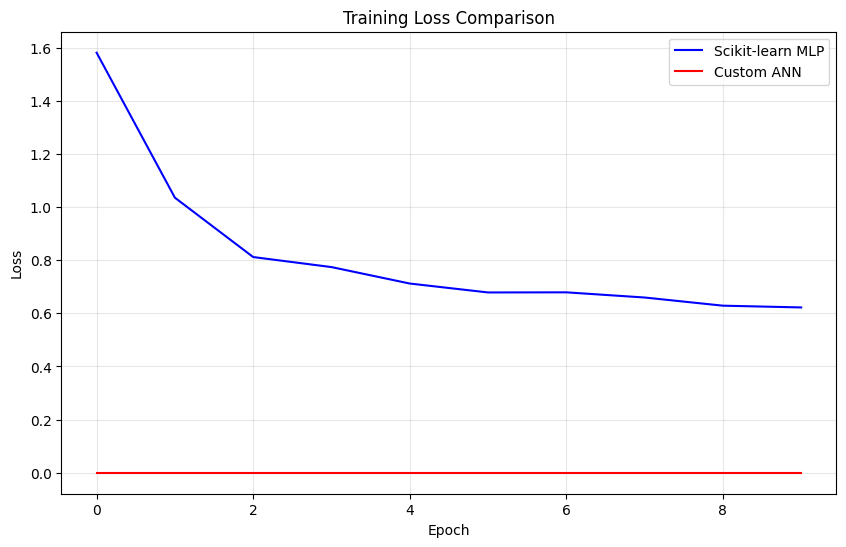

In [11]:
plot_results(mlp_loss, custom_loss)

In [12]:
visualizer = ANNVisualizer(model)

# Network architecture

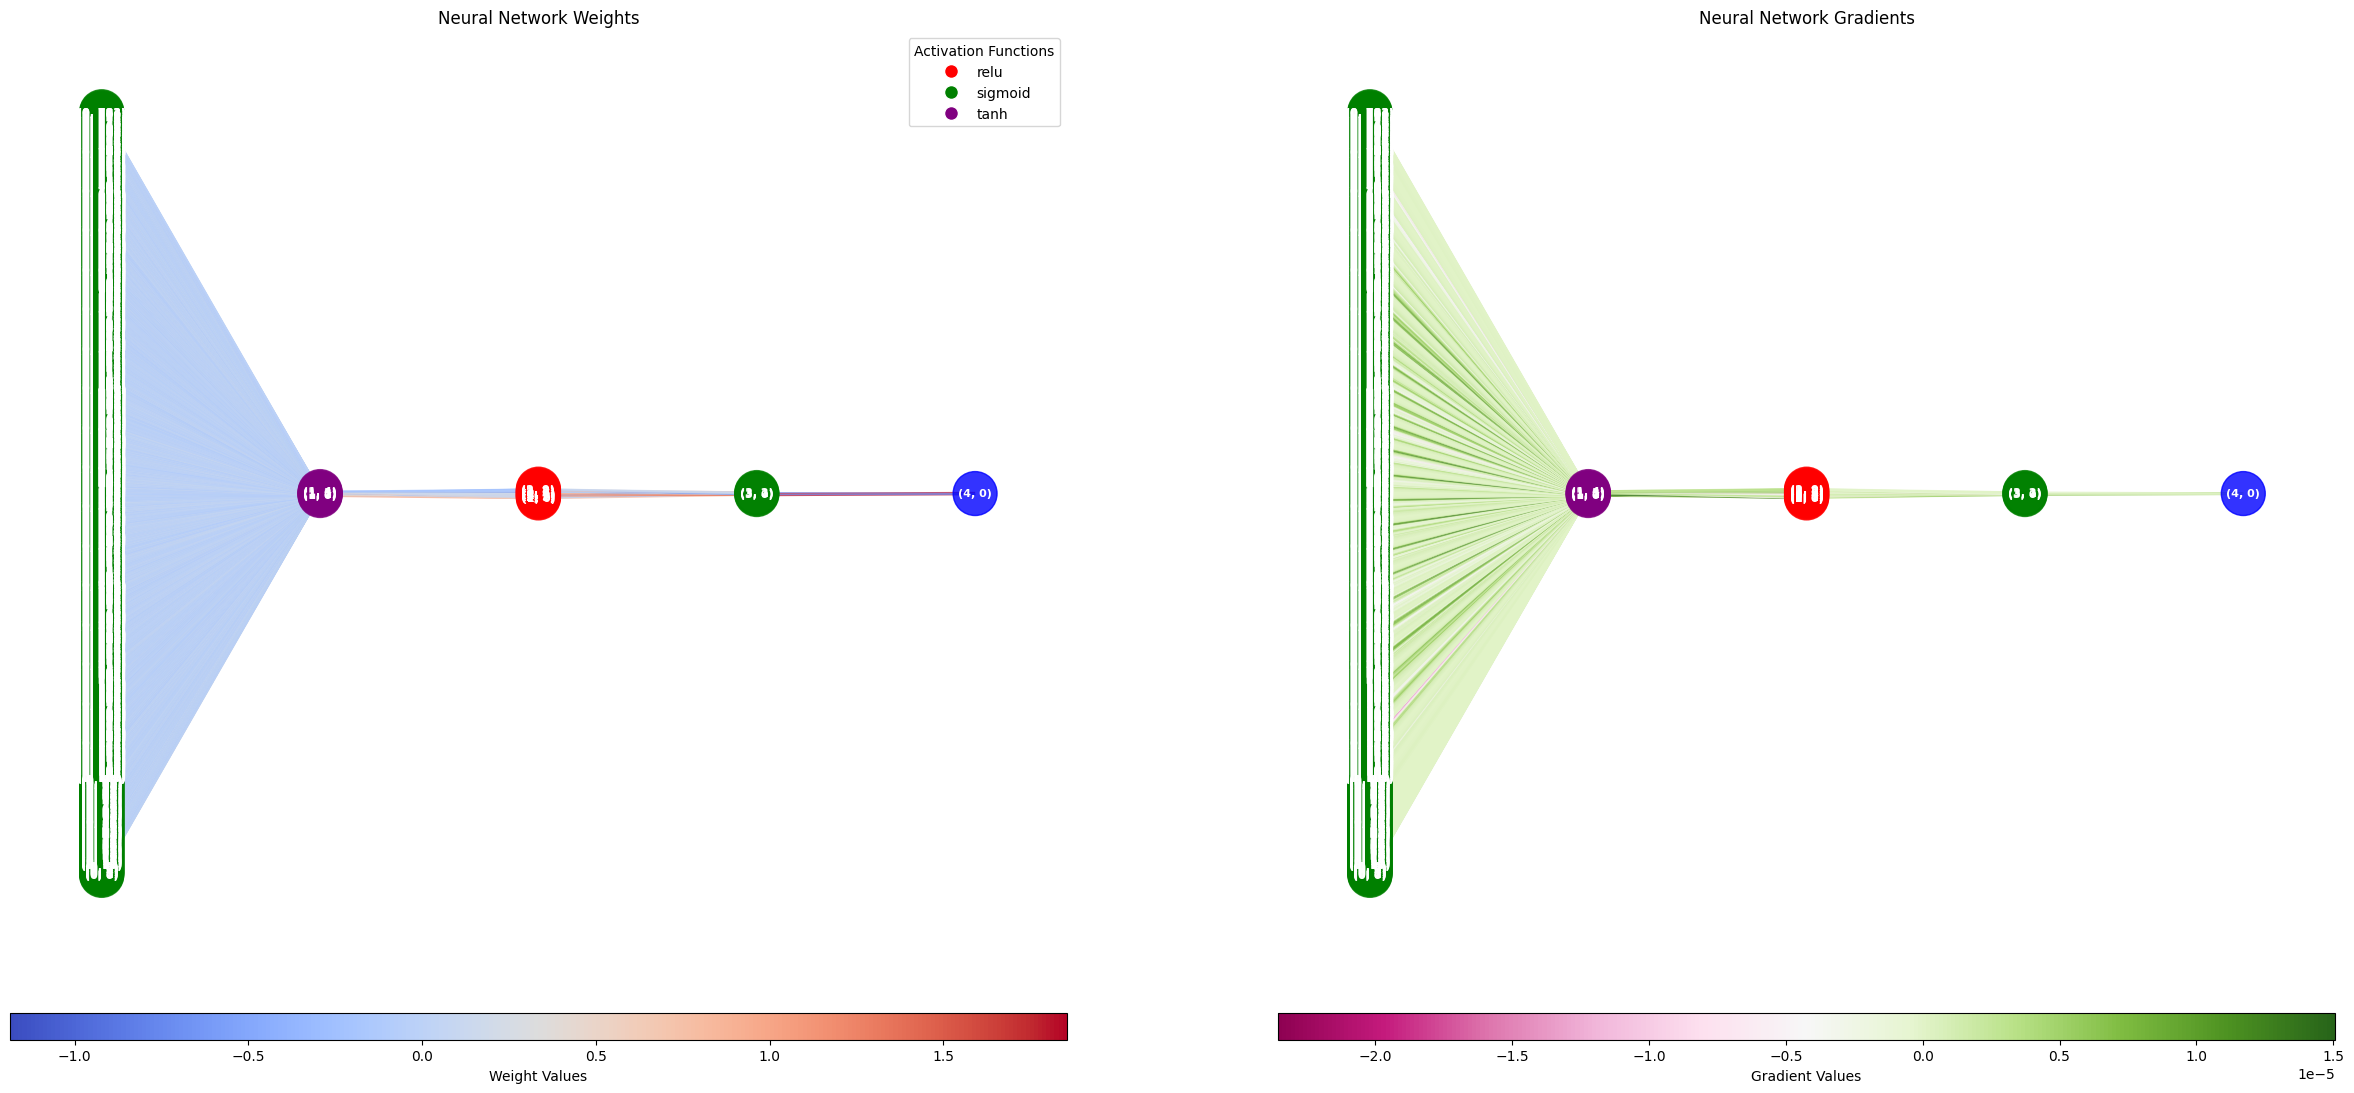

In [13]:
visualizer.visualize_network()

# Weight distributions

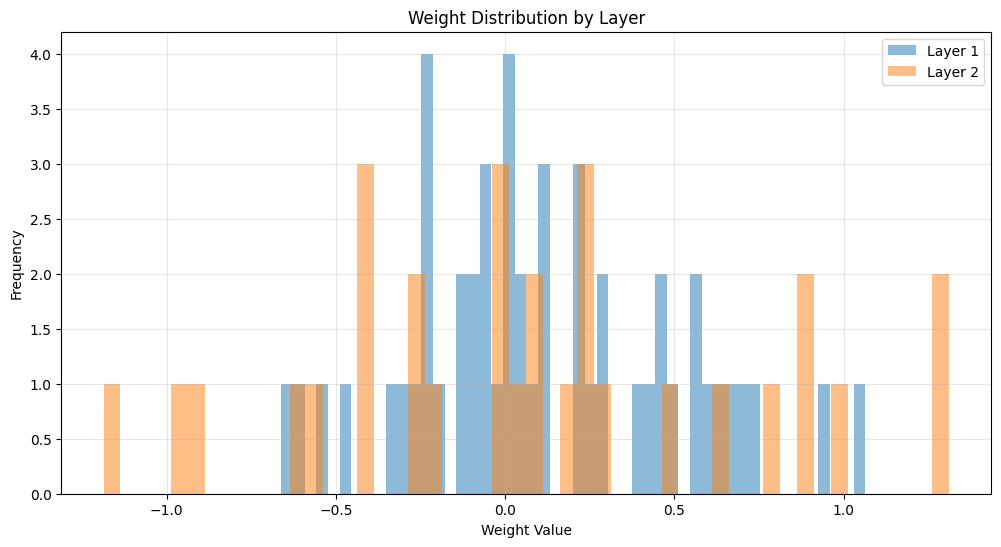

In [14]:
# layers = input("Enter layers to show (comma separated, leave empty for all): ")
# layers = [int(l) for l in layers.split(',')] if layers else None
visualizer.plot_weight_distribution(layers=[1, 2])

# Gradient distributions

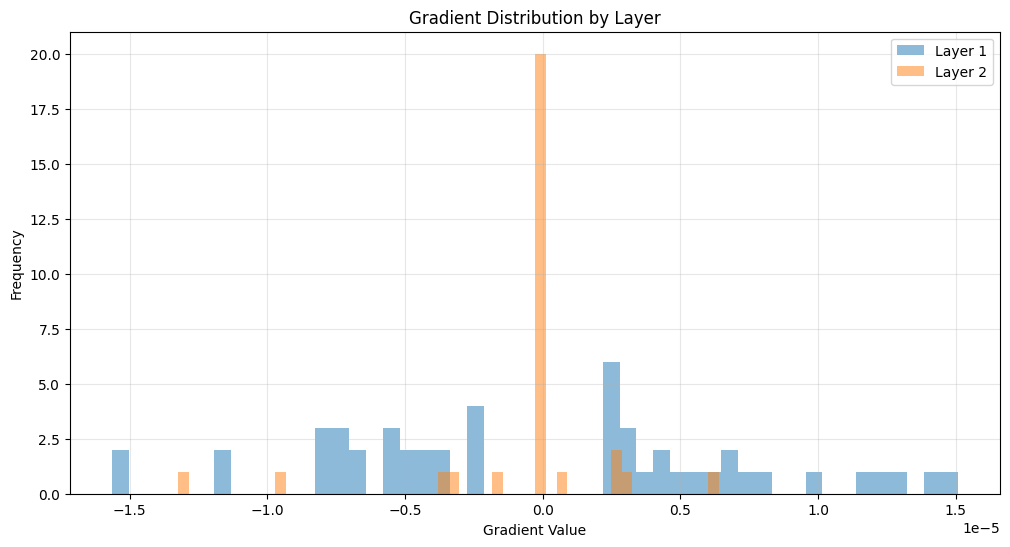

In [15]:
# layers = input("Enter layers to show (comma separated, leave empty for all): ")
# layers = [int(l) for l in layers.split(',')] if layers else None
visualizer.plot_gradient_distribution(layers=[1, 2])

# Neuron-specific inspection

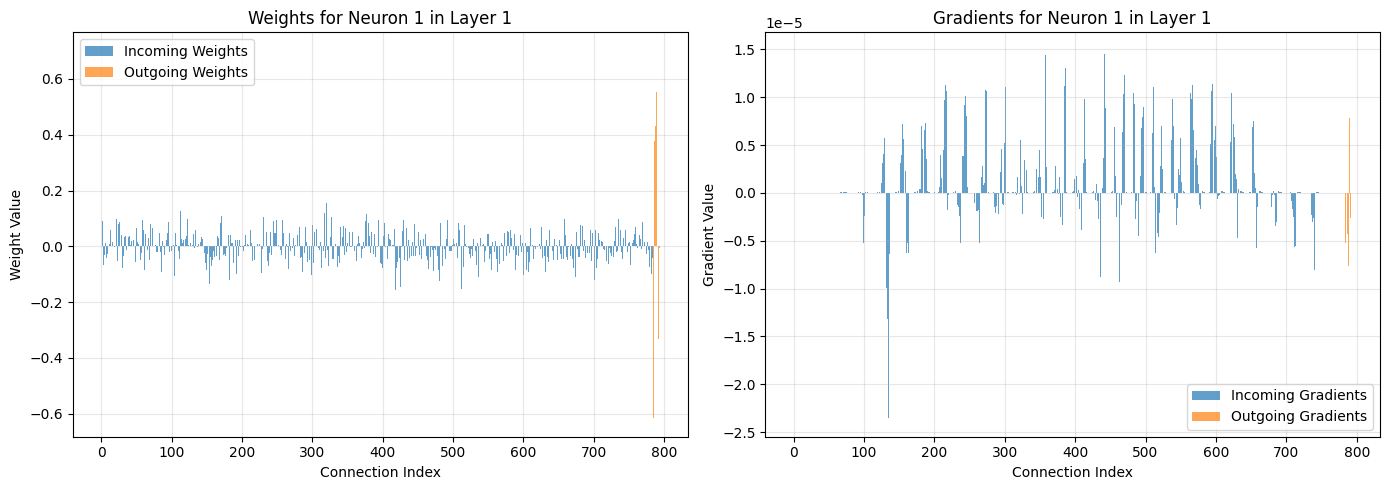

In [18]:
visualizer.plot_neuron_analysis(layer_idx=1, neuron_idx=1)

In [ ]:
model.save_model('saved_models/my_ann_model.pkl')
print("Model saved successfully!")